In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision
from torch import nn

# Digit Classification with PyTorch

In this notebook we will go over how to define a simple [LeNet-5](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) style network to classify images containing a single digit. This notebook is adapted from the [quickstart tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) on pytorch.org.

Load datasets and create data loaders.

In [2]:
from torchvision.transforms import ToTensor

train_dataset = torchvision.datasets.MNIST(
    root='data', train=True, download=True, transform=ToTensor())
test_dataset = torchvision.datasets.MNIST(
    root='data', train=False, download=True, transform=ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64)

Visualize sample training data.

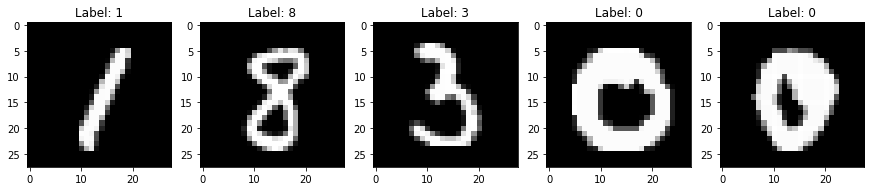

In [3]:
import random

n_samples = 5
fix, axs = plt.subplots(1, n_samples, figsize=(15, 3))
idxs = random.sample(range(len(train_dataset)), n_samples)
for i, idx in enumerate(idxs):
    x, y = train_dataset[idx]
    axs[i].imshow(x[0], cmap='gray')
    axs[i].set_title(f'Label: {y}')
plt.show()

Define and create a simple neural network.

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layers = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.layers(x)
        return logits


model = NeuralNet().to(device)
print(model)

NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=10, bias=True)
  )
)


Choose the loss function and the optimizer.

In [5]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

Define the training loop and the testing loop.

In [6]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for i, (inp, label) in enumerate(dataloader):
        inp, label = inp.to(device), label.to(device)
        
        pred = model(inp)
        loss = loss_fn(pred, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            loss, seen = loss.item(), (i+1) * len(inp)
            print(f"[{seen:>5d}/{size:>5d}] loss: {loss:>7f}")

            
def test(dataloader, model):
    size = len(dataloader.dataset)
    model.eval()
    correct = 0
    with torch.no_grad():
        for inp, label in dataloader:
            inp, label = inp.to(device), label.to(device)
            pred = model(inp)
            correct += (pred.argmax(1) == label).type(torch.float).sum().item()
    accuracy = correct / size
    print(f"Test accuracy: {accuracy*100:>6.3f}\n")

Run training and testing.

In [7]:
for i in range(5):
    print(f"Epoch {i+1}")
    print("----------------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model)

Epoch 1
----------------------------------------
[ 6400/60000] loss: 2.289689
[12800/60000] loss: 2.259674
[19200/60000] loss: 2.262923
[25600/60000] loss: 2.210174
[32000/60000] loss: 2.207281
[38400/60000] loss: 2.201024
[44800/60000] loss: 2.169732
[51200/60000] loss: 2.155354
[57600/60000] loss: 2.106178
Test accuracy: 57.590

Epoch 2
----------------------------------------
[ 6400/60000] loss: 2.071312
[12800/60000] loss: 2.049633
[19200/60000] loss: 2.067945
[25600/60000] loss: 1.975704
[32000/60000] loss: 1.986210
[38400/60000] loss: 1.988342
[44800/60000] loss: 1.939918
[51200/60000] loss: 1.915623
[57600/60000] loss: 1.836683
Test accuracy: 71.970

Epoch 3
----------------------------------------
[ 6400/60000] loss: 1.786709
[12800/60000] loss: 1.777168
[19200/60000] loss: 1.808881
[25600/60000] loss: 1.674593
[32000/60000] loss: 1.696633
[38400/60000] loss: 1.708554
[44800/60000] loss: 1.646619
[51200/60000] loss: 1.619447
[57600/60000] loss: 1.512141
Test accuracy: 77.140

E

(1 point) What is the training loss at the very beginning of the training process? Why? (Hint: If we randomly pick a class as our prediction, what is the probability of it being correct?)

In [8]:
# Type your answer below.
# 

Check predictions on sample testing data.

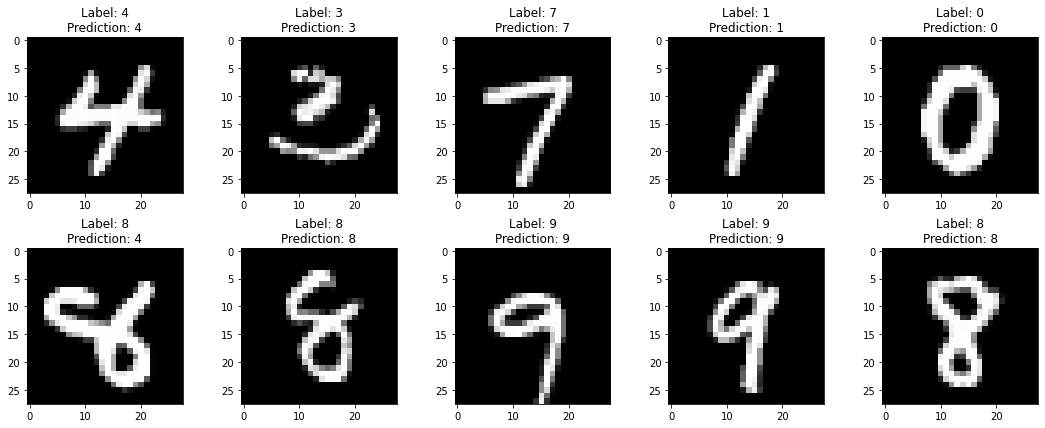

In [9]:
n_rows, n_cols = 2, 5
fix, axs = plt.subplots(n_rows, n_cols, figsize=(15, 3*n_rows))
idxs = random.sample(range(len(test_dataset)), n_rows * n_cols)
for i, idx in enumerate(idxs):
    ax = axs[i//n_cols, i%n_cols]
    
    x, y = test_dataset[idx]
    ax.imshow(x[0], cmap='gray')
    
    x = x.unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        pred = model(x)
        pred_y = pred[0].argmax(0).item()
        
    ax.set_title(f'Label: {y}\nPrediction: {pred_y}')
plt.tight_layout()
plt.show()